In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

shape_path = 'cb_2018_us_state_20m.shp'

shape = gpd.read_file(shape_path)
print(shape.head())

  STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      24  01714934  0400000US24    24     MD      Maryland   00   
1      19  01779785  0400000US19    19     IA          Iowa   00   
2      10  01779781  0400000US10    10     DE      Delaware   00   
3      39  01085497  0400000US39    39     OH          Ohio   00   
4      42  01779798  0400000US42    42     PA  Pennsylvania   00   

          ALAND       AWATER  \
0   25151100280   6979966958   
1  144661267977   1084180812   
2    5045925646   1399985648   
3  105828882568  10268850702   
4  115884442321   3394589990   

                                            geometry  
0  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...  
1  POLYGON ((-96.62187 42.77925, -96.57794 42.827...  
2  POLYGON ((-75.77379 39.72220, -75.75323 39.757...  
3  MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...  
4  POLYGON ((-80.51989 40.90666, -80.51964 40.987...  


In [2]:
shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

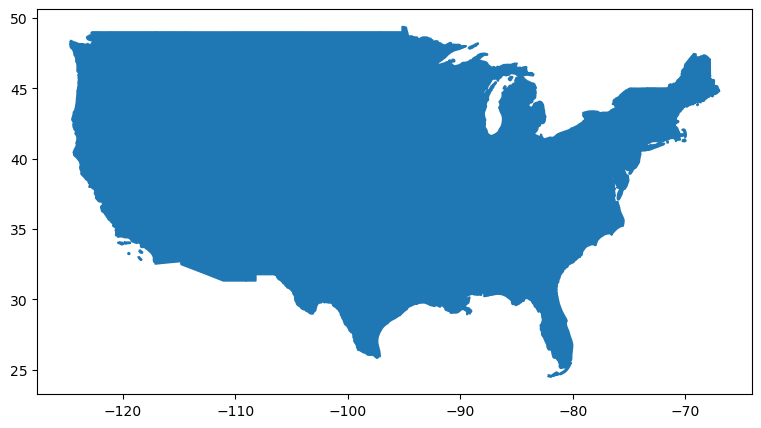

In [3]:
ax = shape.boundary.plot(figsize=(10, 5))
shape.plot(ax=ax, legend=True)

plt.show()

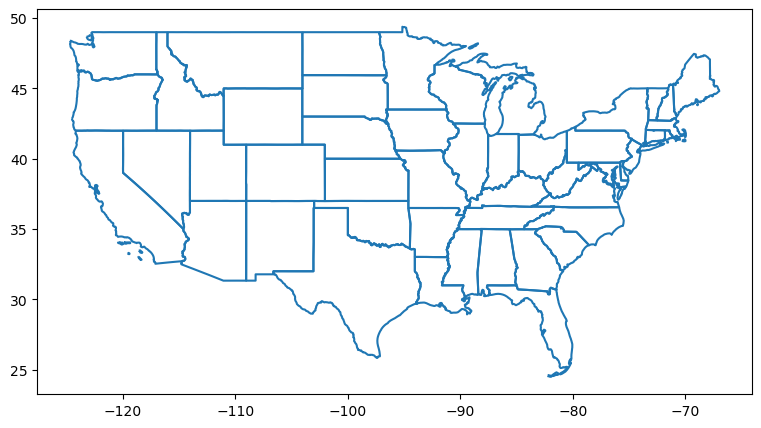

In [4]:
shape.boundary.plot(figsize=(10, 5))
plt.show()

In [5]:
pd_cities = pd.read_csv('test_data_2.csv')
cities = gpd.GeoDataFrame(
    pd_cities, geometry=gpd.points_from_xy(pd_cities.Longitude, pd_cities.Latitude))
cities.crs = 'EPSG:4326'
cities = cities.to_crs(shape.crs)

cities.head()

,Latitude,Longitude,geometry
0,33.60094,-86.95611,POINT (-86.95611 33.60094)


In [6]:
# cities dataframe treatment

uscities = pd.read_csv('uscities.csv')

uscities = uscities[["city", "state_id", "lat", "lng"]]

uscities.head()

,city,state_id,lat,lng
0,City of Industry,CA,34.0050,-117.939
1,Avon,CT,41.7944,-72.8578
2,Branford,CT,41.2778,-72.7997
3,Cromwell,CT,41.5950,-72.6453
4,East Windsor,CT,41.9167,-72.5578


In [7]:
# checking cities btw the two df (uscities and modified fandom)

df = pd.read_csv(r'C:\Users\inesn\Documents\Mines\2A\TR\econometrics\data_collection\plein_de_data\fandom_traitées.csv', parse_dates = ["Opening_date", "Closing_date"])

n_tot = 0
for state in df.State.unique():
    print(state)
    n= 0
    for city in df[df.State == state].Town.unique():
        if city not in uscities[uscities.state_id == state].city.unique() :
            n_tot+=1
            n+= 1
            print(city)
    print(n)
print(n_tot)

AL
0
AK
0
AZ
0
AR
0
CA
0
CO
0
CT
Milford city
1
DE
0
DC
0
FL
0
GA
0
HI
0
ID
0
IL
0
IN
0
IA
0
KS
0
KY
0
LA
0
ME
Farmington
Houlton
Lincoln
Mexico
Oxford
Palmyra
Scarborough
Skowhegan
Thomaston
Windham
10
MD
Hanover
LaVale
Nottingham
3
MA
Abington
Avon
Bellingham
Chelmsford
Danvers
Fairhaven
Hadley
Halifax
Hudson
Leicester
Lunenburg
Methuen
North Attleboro
North Dartmouth
North Oxford
North Reading
Northborough
Orange
Plymouth
Raynham
Saugus
Seekonk
Sturbridge
Swansea
Tewksbury
Walpole
Ware
Wareham
West Boylston
Weymouth
Hanover
31
MI
Canton
Chesterfield
Clinton Township
Commerce
Fort Gratiot
Jonesboro
New Hudson
Saint Johns
Sault Sainte Marie
Shelby Township
Van Buren Twp.
White Lake
Ysplanti
13
MN
Saint Paul
1
MS
0
MO
Lake Saint Louis
Lees Summit
Saint Charles
Saint Joseph
Saint Louis
Saint Peters
Saint Robert
7
MT
0
NE
0
NV
0
NH
Amherst
Derry
Epping
Gilford
Gorham
Hinsdale
Hooksett
Hudson
Littleton
Newington
Plaistow
Plymouth
Rindge
Salem
Seabrook
Tilton
West Lebanon
Bedford
18
NJ
Bri

In [59]:
df = pd.read_csv(r'C:\Users\inesn\Documents\Mines\2A\TR\econometrics\data_collection\plein_de_data\fandom_traitées.csv', parse_dates = ["Opening_date", "Closing_date"])

#modifying fandom df

#Store_id,State,Town,Street,Category,Opening_date,Closing_date

#creating boolean columns for entry/exit in 2016 (no entry and exit in 2016 for a single store)
df['opened_2016'] = (df.Opening_date>='2016-01-01')&(df.Opening_date<'2017-01-01')
df['closed_2016'] = (df.Closing_date>='2016-01-01')&(df.Closing_date<'2017-01-01')

#keeping only stores with entry/exit in 2016
df = df[df.opened_2016 | df.closed_2016]
df.describe()


C:\Users\inesn\AppData\Local\Temp\ipykernel_17552\644086837.py:13: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()
C:\Users\inesn\AppData\Local\Temp\ipykernel_17552\644086837.py:13: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Store_id,State,Town,Street,Category,Opening_date,Closing_date,opened_2016,closed_2016
count,312,312,312,312,312,213,153,312,312
unique,311,35,275,312,5,50,9,2,2
top,883,TX,San Antonio,1810 Shug Jordan Pkwy,Neighborhood Market,2016-01-27 00:00:00,2016-01-28 00:00:00,True,False
freq,2,60,5,1,246,29,118,166,166
first,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,2016-01-17 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-12-07 00:00:00,2022-01-01 00:00:00,NaN,NaN


In [60]:
#designing the red-orange-green color code

df2 = df.groupby(['Town','State'])['opened_2016'].any().rename('opened_2016_city').to_frame()
df3 = df.groupby(['Town','State'])['closed_2016'].any().rename('closed_2016_city').to_frame()
df4 = df2.merge(df3, how = "outer", on = ['Town','State'])
df4['opened_and_closed_2016_city']=df4.opened_2016_city & df4.closed_2016_city
df4.head()

,,opened_2016_city,closed_2016_city,opened_and_closed_2016_city
Town,State,,,
Abbeville,AL,False,True,False
Abilene,TX,True,False,False
Abingdon,VA,True,False,False
Adel,GA,True,False,False
Alamogordo,NM,True,False,False


In [61]:
df5 = df4.merge(df, how = "outer", on = ['Town','State'])
df5=df5[['Town','State','opened_2016_city','closed_2016_city','opened_and_closed_2016_city']]
#aggregation_functions = {'Town': 'first', 'State': 'second', 'opened_2016_city': 'third' ,'closed_2016_city': 'fourth','opened_and_closed_2016_city': 'fifth','town': 'sum'}
#df_new = df5.groupby(df5[['Town','State']]).aggregate(aggregation_functions)
df5.head()

,Town,State,opened_2016_city,closed_2016_city,opened_and_closed_2016_city
0,Abbeville,AL,False,True,False
1,Abilene,TX,True,False,False
2,Abingdon,VA,True,False,False
3,Adel,GA,True,False,False
4,Alamogordo,NM,True,False,False


In [62]:
#merging the 2 dfs

map_data = pd.merge(df5, uscities,  how='inner', left_on=['Town','State'], right_on = ['city','state_id'])

#removing unnecessary columns ('Town', 'State')

map_data = map_data[['city','lat','lng','opened_2016_city','closed_2016_city','opened_and_closed_2016_city']]

def colors(x):
    if x == 1 :
        return 'g'
    if x == 2 :
        return 'r'
    return 'b'

colors_v = np.vectorize(colors)

map_data['value']= 1*map_data['opened_2016_city']+2*map_data['closed_2016_city']+3*map_data['opened_and_closed_2016_city']
map_data['color']=colors_v(map_data['value'])
map_data.describe()

,lat,value
count,310.000000,310.000000
mean,34.111794,1.516129
std,3.966739,0.666875
min,25.997500,1.000000
25%,31.569200,1.000000
50%,34.099650,1.000000
75%,35.882675,2.000000
max,58.454600,6.000000


In [63]:
geo_map_data = gpd.GeoDataFrame(
    map_data, geometry=gpd.points_from_xy(map_data.lng, map_data.lat))
geo_map_data.crs = 'EPSG:4326'
geo_map_data = geo_map_data.to_crs(shape.crs)

geo_map_data.head()

,city,lat,lng,opened_2016_city,closed_2016_city,opened_and_closed_2016_city,value,color,geometry
0,Abbeville,31.5664,-85.2528,False,True,False,2,r,POINT (-85.25280 31.56640)
1,Abilene,32.4543,-99.7384,True,False,False,1,g,POINT (-99.73840 32.45430)
2,Abingdon,36.7090,-81.9713,True,False,False,1,g,POINT (-81.97130 36.70900)
3,Adel,31.1264,-83.4229,True,False,False,1,g,POINT (-83.42290 31.12640)
4,Alamogordo,32.8837,-105.9625,True,False,False,1,g,POINT (-105.96250 32.88370)


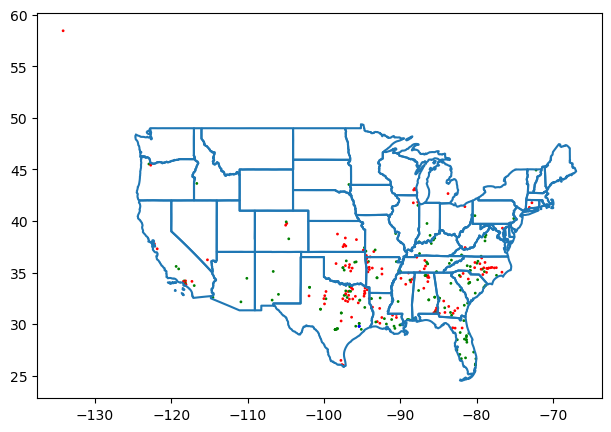

In [64]:
base = shape.boundary.plot(figsize=(10, 5))

geo_map_data.plot(ax=base, marker='o', color=geo_map_data['color'], markersize=1);

plt.show()

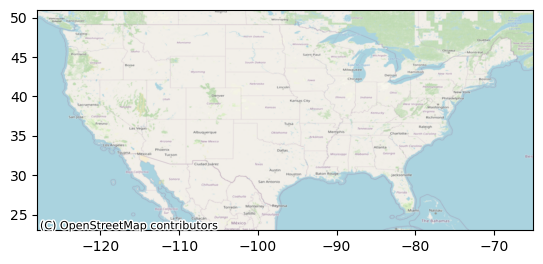

In [14]:
import geopandas as gpd
import contextily as cx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as pa
from matplotlib.lines import Line2D

long_min = - 128
long_max = -65
lat_min = 23
lat_max = 51

#collecte de la dataframe...
df = pd.read_csv('test_data.csv', parse_dates = ["Opening_date", "Closing_date"])
df = df[['Latitude', 'Longitude', 'State']]
df.head()

#conversion en geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs='EPSG:4326')

#création des couleurs/tailles de points
def couleur(a): # couleur d'un point du graphique en fonction de a la date du séisme en km
    if a == "opened":
        return 'purple'
    elif a == "closed":
        return 'blue'
    elif a == "opened-closed":
        return 'green'
    return 'yellow'

vcouleur = np.vectorize(couleur)

color=vcouleur(df['State'])

fig, ax = plt.subplots() #gdf.plot(kind='scatter', y='Latitude', x='Longitude', s=magn_2, c=prof, edgecolors='k', linewidth = 0.6)
ax.set_xlim(long_min, long_max)
ax.set_ylim(lat_min, lat_max)
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.OpenStreetMap.Mapnik) #OpenStreetMap.Mapnik

line1 = Line2D(range(1), range(1), color="purple", marker='o', markerfacecolor="purple")
line2 = Line2D(range(1), range(1), color="blue", marker='o',markerfacecolor="blue")
line3 = Line2D(range(1), range(1), color="cyan", marker='o', markerfacecolor="cyan")
line4 = Line2D(range(1), range(1), color="green", marker='o',markerfacecolor="green")
line5 = Line2D(range(1), range(1), color="yellow", marker='o',markerfacecolor="yellow")
#plt.legend((line1,line2,line3,line4, line5),('< 2 km', '2-4 km', '4-6 km', '6-8 km', '8-10 km'),numpoints=1, loc='lower right',title = 'Profondeur',borderpad = 0.5, labelspacing = 0.5)

plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as pa
from matplotlib.lines import Line2D

long_min = - 128
long_max = -65
lat_min = 23
long_max = 51

#collecte de la dataframe...
df = pd.read_csv('test_data.csv', parse_dates = ["Opening_date", "Closing_date"])

df.head()

,Store_id,State,Town,Street,Category,Opening_date,Closing_date,Latitude,Longitude,State
0,1158,AL,Adamsville,2473 Hackworth Rd.,Walmart Supercenter,1988-03-01,NaT,33.60094,-86.95611,"""opened"""


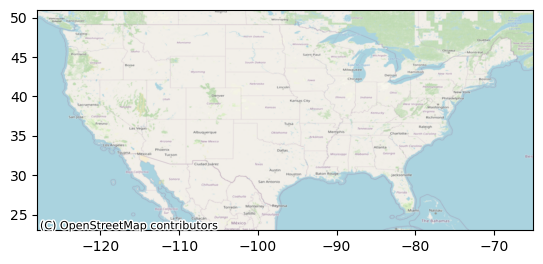

In [16]:
import geopandas as gpd
import contextily as cx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as pa
from matplotlib.lines import Line2D

long_min = - 128
long_max = -65
lat_min = 23
lat_max = 51

#collecte de la dataframe...
df = pd.read_csv('test_data.csv', parse_dates = ["Opening_date", "Closing_date"])
df = df[['Latitude', 'Longitude', 'State']]
df.head()

#conversion en geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs='EPSG:4326')

fig, ax = plt.subplots() #gdf.plot(kind='scatter', y='Latitude', x='Longitude', s=magn_2, c=prof, edgecolors='k', linewidth = 0.6)
ax.set_xlim(long_min, long_max)
ax.set_ylim(lat_min, lat_max)
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.OpenStreetMap.Mapnik) #OpenStreetMap.Mapnik

plt.show()